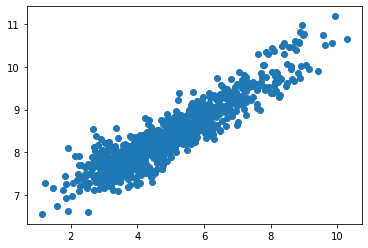

In [126]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random
%matplotlib inline

spectra = pd.read_csv('spectra.dat', delimiter=' ', header=None)
wavelengths = pd.read_csv('wavelengths.csv', header=None)
galaxy_properties = pd.read_csv('galaxy_properties.csv', index_col = 0)

mass = galaxy_properties['mass']
X = np.empty(len(spectra))
for i in range(len(spectra)):
    X[i] = np.log(np.sum(spectra.loc[i]))

plt.scatter(X, mass)

In [221]:
from sklearn.linear_model import RidgeCV, Ridge, Lasso, LassoCV, LinearRegression
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate, GridSearchCV
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(spectra, mass, random_state = 101)
model = Ridge(random_state=1)
model.fit(X_train, y_train)
predict = model.predict(X_test)

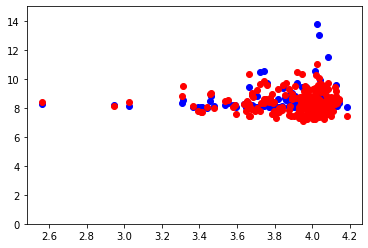

In [178]:
X = np.empty(len(X_test))
for i in range(len(X_test)):
    X[i] = np.log(np.sum(X_test[i]))

plt.ylim(0, 15)
plt.scatter(X, predict, c='blue')
plt.scatter(X, y_test, c='red')

In [179]:
print(mean_squared_error(y_test, predict))

0.26707615166906645


In [206]:
alphas = np.arange(0.4, 0.6, 0.01)

model = RidgeCV(alphas=alphas, cv = KFold(n_splits=5, shuffle=True, random_state=101))
model.fit(spectra, mass)

print("Best alpha: ", model.alpha_)

Best alpha:  0.5300000000000001


In [207]:
model.coef_.shape

(850,)

In [208]:
prediction = model.predict(spectra)

In [209]:
mean_squared_error(mass, prediction)

0.20139649262171855

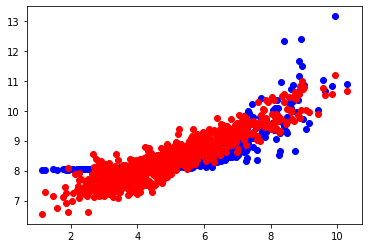

In [210]:
X = np.empty(len(spectra))
for i in range(len(spectra)):
    X[i] = np.log(np.sum(spectra.loc[i]))

plt.scatter(X, prediction, c='blue')
plt.scatter(X, mass, c='red')

In [211]:
from sklearn.tree import DecisionTreeRegressor

X_train, X_test, y_train, y_test = train_test_split(spectra, mass, random_state = 101)
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [214]:
prediction = model.predict(X_test)
mean_squared_error(prediction, y_test)

0.025698195527615545

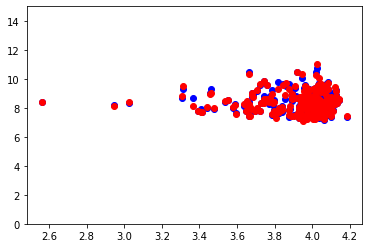

In [217]:
X = np.empty(len(X_test))
for i in range(len(X_test)):
    X[i] = np.log(np.sum(X_test[i]))

plt.ylim(0, 15)
plt.scatter(X, prediction, c='blue')
plt.scatter(X, y_test, c='red')

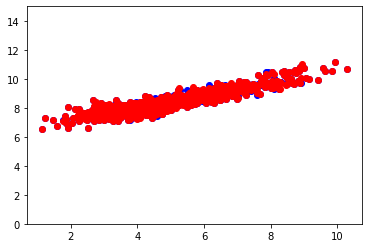

In [219]:
X = np.empty(len(spectra))
for i in range(len(spectra)):
    X[i] = np.log(np.sum(spectra.iloc[i]))

plt.ylim(0, 15)
plt.scatter(X, model.predict(spectra), c='blue')
plt.scatter(X, mass, c='red')

In [226]:
params = {
    'max_depth': [None, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2', 212, 425, 638]
}

dtr = DecisionTreeRegressor(random_state=101)
model = GridSearchCV(dtr, params, scoring = 'neg_mean_squared_error', verbose = 2, n_jobs = 4, return_train_score=True, cv = KFold(n_splits=5, shuffle=True, random_state=101))
model.fit(spectra, mass)
bm = model.best_estimator_
print(model.best_score_)
print(model.best_params_)

X = np.empty(len(spectra))
for i in range(len(spectra)):
    X[i] = np.log(np.sum(spectra.iloc[i]))

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done  90 out of  90 | elapsed:    3.8s finished


-0.02489117013801586
{'max_depth': None, 'max_features': 638}


In [231]:
params = {
    'max_features': np.arange(800, 850, 1)
}

dtr = DecisionTreeRegressor(random_state=101)
model = GridSearchCV(dtr, params, scoring = 'neg_mean_squared_error', verbose = 2, n_jobs = 4, return_train_score=True, cv = KFold(n_splits=5, shuffle=True, random_state=101))
model.fit(spectra, mass)
bm = model.best_estimator_
print(model.best_score_)
print(model.best_params_)

X = np.empty(len(spectra))
for i in range(len(spectra)):
    X[i] = np.log(np.sum(spectra.iloc[i]))

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    3.7s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   16.7s
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:   27.1s finished


-0.023033749400405357
{'max_features': 803}


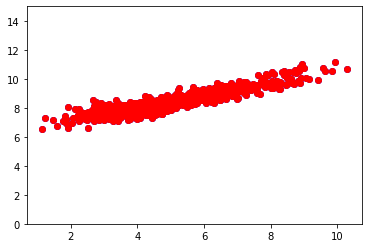

In [232]:
plt.ylim(0, 15)
plt.scatter(X, bm.predict(spectra), c='blue')
plt.scatter(X, mass, c='red')

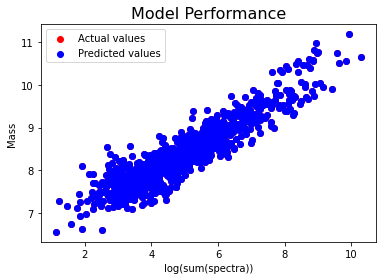

In [238]:
fig, ax = plt.subplots()
ax.scatter(X, mass, color='red', label='Actual values')
plt.scatter(X, bm.predict(spectra), color='blue', label='Predicted values')
ax.legend()
ax.set_title("Model Performance", fontsize=16)
ax.set_ylabel("Mass")
ax.set_xlabel("log(sum(spectra))")
fig.savefig("model_performance mass", dpi=300)

In [239]:
spectra

,0,1,2,3,4,5,6,7,8,9,...,840,841,842,843,844,845,846,847,848,849
0,0.010532,0.011854,0.011477,0.011186,0.010723,0.007781,0.003281,0.007836,0.008751,0.012667,...,0.024035,0.023810,0.024046,0.023865,0.023751,0.023780,0.023700,0.023532,0.023523,0.023560
1,0.012206,0.013479,0.013350,0.013068,0.013404,0.011025,0.005107,0.011005,0.012001,0.014975,...,0.045495,0.044942,0.045321,0.044943,0.044721,0.044843,0.044598,0.043910,0.043594,0.043794
2,0.003660,0.004010,0.004001,0.003920,0.004109,0.003515,0.001691,0.003498,0.003792,0.004505,...,0.016169,0.015951,0.016057,0.015907,0.015811,0.015818,0.015722,0.015475,0.015348,0.015374
3,0.065447,0.071665,0.071253,0.069657,0.072569,0.061464,0.029246,0.060936,0.065971,0.078945,...,0.052733,0.051933,0.052260,0.051681,0.051270,0.051238,0.050767,0.049790,0.049233,0.049177
4,0.143073,0.156413,0.155725,0.152241,0.159254,0.135972,0.065265,0.134719,0.145695,0.172647,...,0.071784,0.070843,0.071313,0.070579,0.070022,0.069911,0.069362,0.068354,0.067859,0.067661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.084785,0.092999,0.092949,0.091197,0.095809,0.082226,0.039687,0.082043,0.089028,0.105681,...,0.237033,0.234978,0.237017,0.236048,0.235719,0.236943,0.236522,0.234346,0.233746,0.235702
996,0.014452,0.015888,0.016062,0.015868,0.017012,0.015016,0.007340,0.015144,0.016453,0.019114,...,0.116852,0.117667,0.119247,0.120329,0.121477,0.123043,0.124556,0.126414,0.128591,0.131057
997,0.153889,0.168172,0.167482,0.163732,0.171433,0.146658,0.070557,0.145284,0.157084,0.185707,...,0.077033,0.076005,0.076492,0.075710,0.075119,0.075009,0.074406,0.073292,0.072723,0.072523
998,0.025145,0.027639,0.027524,0.026976,0.028090,0.023713,0.011243,0.023641,0.025681,0.031034,...,0.054181,0.053688,0.054170,0.053871,0.053724,0.053934,0.053792,0.053276,0.053137,0.053471


In [240]:
mean = spectra[0] * 0.01

In [242]:
spectra[0]

(1000,)

In [258]:
import scipy.stats

gauss_dist = scipy.stats.norm.rvs(loc=mean, scale=0.000001, random_state = 101)

In [261]:
gauss_dist

array([ 1.08026850e-04,  1.22683133e-04,  3.75084694e-05,  6.54971826e-04,
        1.43138112e-03,  1.68964682e-04,  9.10261923e-04,  9.14454653e-05,
        2.29819183e-03,  5.67970122e-04,  9.68842135e-05,  1.04817100e-03,
        1.55805870e-03,  9.04807128e-04,  1.02614676e-03,  1.44480057e-04,
        1.10228908e-02,  1.18880876e-03,  1.57302967e-04,  1.29745509e-04,
        1.98595267e-03,  1.88484372e-03,  8.01148141e-05,  2.08908881e-04,
        4.53857516e-03,  4.82967528e-04,  7.12284046e-05,  1.43694502e-04,
        5.30930706e-04,  5.64517960e-04,  9.79370787e-04,  6.07377646e-04,
        2.21145896e-04,  8.14143930e-04,  8.42295936e-05,  9.59886752e-04,
        9.56430227e-04,  6.69992175e-03,  2.63724127e-04,  6.21375652e-04,
        1.29333737e-04,  2.48910680e-03,  1.21551554e-05,  5.26566366e-04,
        1.05216984e-04,  2.99850096e-07,  1.02381842e-03,  2.51424983e-03,
        2.02792464e-05,  5.85096974e-03,  8.20757747e-05,  1.07544358e-03,
        4.38476027e-04,  

In [262]:
gauss_dist = scipy.stats.norm.rvs(loc=mean, scale=0.01, random_state = 101)

In [263]:
gauss_dist

array([ 2.71738184e-02,  6.40338209e-03,  9.11629496e-03,  5.69272554e-03,
        7.94190948e-03, -3.02389645e-03, -7.56965983e-03,  6.15049299e-03,
       -1.78814724e-02,  7.96845057e-03,  5.38449034e-03, -4.84124533e-03,
        3.44482309e-03, -6.68315456e-03, -8.30529216e-03,  9.69409009e-03,
        1.29306432e-02,  2.09744032e-02,  2.62143698e-02,  6.96415086e-03,
        5.01230449e-03,  1.88203793e-02, -1.69790384e-02, -1.13811262e-02,
        3.19030279e-03,  4.38785543e-03,  1.74010786e-03,  1.98852859e-03,
        8.60718214e-03,  1.29404175e-03,  7.36660213e-03,  3.90351099e-03,
       -4.74939723e-03, -6.72579901e-03, -9.34889103e-03,  5.80691847e-03,
       -2.11186165e-04,  2.57155680e-02,  2.64475559e-03,  2.05859019e-02,
       -9.80230800e-03,  4.45690505e-03, -1.13531541e-02,  5.30230796e-04,
        1.03640325e-02, -1.56552259e-03,  7.08058561e-04,  9.01185833e-03,
        2.15665888e-02, -2.51008558e-04, -7.47042230e-03, -2.38839504e-03,
        1.90859671e-03, -

In [264]:
spectra[0]

0      0.010532
1      0.012206
2      0.003660
3      0.065447
4      0.143073
         ...   
995    0.084785
996    0.014452
997    0.153889
998    0.025145
999    0.046592
Name: 0, Length: 1000, dtype: float64

In [270]:
spectra.iloc[0]

0      0.010532
1      0.011854
2      0.011477
3      0.011186
4      0.010723
         ...   
845    0.023780
846    0.023700
847    0.023532
848    0.023523
849    0.023560
Name: 0, Length: 850, dtype: float64

In [271]:
len(spectra)

1000

In [282]:
def add_noise(df, percent):
    """
    Add a percetange of noise to a Pandas DataFrame.
    Returns a new Pandas DataFrame containing the noise.
    
    Positional arguments:
    - df : a Pandas DataFrame
    - percent: percentage of noise desired, as a float. 
               For example, a value of 0.10 is 10%. 
               Similarly a value of 1.15 is 115%. 
    """
    ndf = pd.DataFrame()
    for i in range(len(df.columns)):
        mean = df[i] * percent
        gauss_dist = scipy.stats.norm.rvs(loc=mean, scale=0.000001, size=1000)
        ndf[i] = df[i] + gauss_dist
        
    return ndf

In [283]:
spectra_1 = add_noise(spectra, 0.01)
spectra_5 = add_noise(spectra, 0.05)
spectra_10 = add_noise(spectra, 0.1)

predict_1 = bm.predict(spectra_1)
predict_5 = bm.predict(spectra_5)
predict_10 = bm.predict(spectra_10)

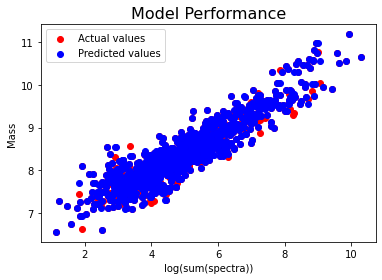

In [285]:
fig, ax = plt.subplots()
ax.scatter(X, mass, color='red', label='Actual values')
plt.scatter(X, predict_1, color='blue', label='Predicted values')
ax.legend()
ax.set_title("Model Performance", fontsize=16)
ax.set_ylabel("Mass")
ax.set_xlabel("log(sum(spectra))")
fig.savefig("model_performance mass", dpi=300)

In [291]:
mean_squared_error(mass, predict_1)

0.006636590992683882

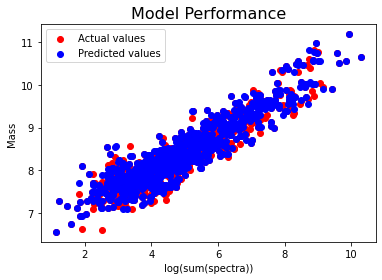

In [287]:
fig, ax = plt.subplots()
ax.scatter(X, mass, color='red', label='Actual values')
plt.scatter(X, predict_5, color='blue', label='Predicted values')
ax.legend()
ax.set_title("Model Performance", fontsize=16)
ax.set_ylabel("Mass")
ax.set_xlabel("log(sum(spectra))")
fig.savefig("model_performance mass", dpi=300)

In [292]:
mean_squared_error(mass, predict_5)

0.014317458060901664

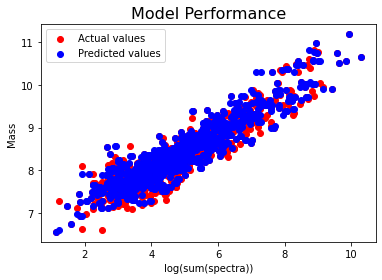

In [288]:
fig, ax = plt.subplots()
ax.scatter(X, mass, color='red', label='Actual values')
plt.scatter(X, predict_10, color='blue', label='Predicted values')
ax.legend()
ax.set_title("Model Performance", fontsize=16)
ax.set_ylabel("Mass")
ax.set_xlabel("log(sum(spectra))")
fig.savefig("model_performance mass", dpi=300)

In [293]:
mean_squared_error(mass, predict_10)

0.020029935823178847